In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("coursea_data.csv")

In [3]:
df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [4]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [5]:
df=df.drop(["Unnamed: 0","course_Certificate_type"],axis=1)

In [6]:
df

,course_title,course_organization,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,4.8,Mixed,320k
...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,4.6,Intermediate,9.8k


In [7]:
df.columns=["title","organization","rating","difficulty","students"]

In [8]:
df

,title,organization,rating,difficulty,students
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,4.8,Mixed,320k
...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,4.5,Intermediate,52k
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,4.8,Mixed,21k
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,4.5,Intermediate,30k
889,Русский как иностранный,Saint Petersburg State University,4.6,Intermediate,9.8k


In [9]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df["difficulty"]=lbe.fit_transform(df["difficulty"])

In [10]:
df.head()

,title,organization,rating,difficulty,students
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,4.7,1,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,4.7,2,17k
2,A Crash Course in Data Science,Johns Hopkins University,4.5,3,130k
3,A Law Student's Toolkit,Yale University,4.7,3,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,4.8,3,320k


In [11]:
def func(x):
    a = x.replace('k','000')
    if '.' in a:
        a = a.replace('.','')
        a= a[:-1]
        return int(a)
    return int(a)
df["students"]=df['students'].apply(func)

 Kursların  katılımcı sayısına  göre sıralanması

In [12]:
df.sort_values(by=['students'],ascending=False)

,title,organization,rating,difficulty,students
196,Data Science,Johns Hopkins University,4.5,1,830000
129,Career Success,"University of California, Irvine",4.4,1,790000
261,English for Career Development,University of Pennsylvania,4.8,3,760000
765,Successful Negotiation: Essential Strategies a...,University of Michigan,4.8,3,750000
199,Data Science: Foundations using R,Johns Hopkins University,4.6,1,740000
...,...,...,...,...,...
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,5.0,1,1500
564,Machine Learning,Stanford University,4.9,3,32
815,The Science of Well-Being,Yale University,4.9,3,25
688,Python for Everybody,University of Michigan,4.8,1,15


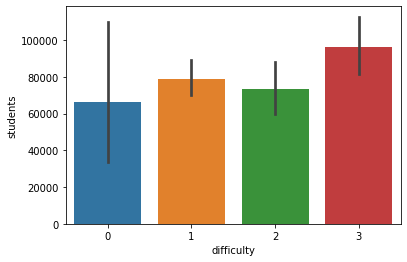

In [13]:
sns.barplot(x="difficulty", y="students" , data=df);

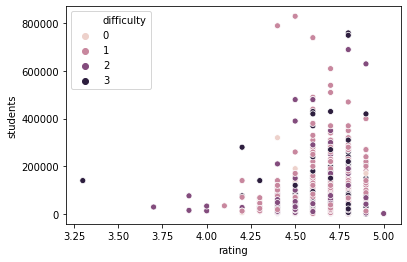

In [14]:
sns.scatterplot(x="rating",y="students",hue="difficulty",data=df);

Python kurslarının katılımcıya göre sıralanması 

In [15]:
df[df['title'].str.contains('Python')].sort_values(by=['students'], ascending=False)

,title,organization,rating,difficulty,students
56,Applied Data Science with Python,University of Michigan,4.5,2,480000
684,Python Data Structures,University of Michigan,4.9,3,420000
487,Introduction to Data Science in Python,University of Michigan,4.5,2,390000
850,Using Python to Access Web Data,University of Michigan,4.8,3,310000
849,Using Databases with Python,University of Michigan,4.8,3,220000
687,Python for Data Science and AI,IBM,4.6,1,170000
57,Applied Machine Learning in Python,University of Michigan,4.6,2,150000
570,Machine Learning with Python,IBM,4.7,2,120000
530,Introdução à Ciência da Computação com Python ...,Universidade de São Paulo,4.9,1,120000
682,Python Basics,University of Michigan,4.8,1,110000


Python kurslarının seviyeye göre sıralanması 

In [16]:
df[df['title'].str.contains('Python')].sort_values(by=['difficulty'], ascending=False)

,title,organization,rating,difficulty,students
674,Programming for Everybody (Getting Started wit...,University of Michigan,4.8,3,13
508,Introduction to Portfolio Construction and Ana...,EDHEC Business School,4.8,3,11000
850,Using Python to Access Web Data,University of Michigan,4.8,3,310000
128,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,4.6,3,82000
849,Using Databases with Python,University of Michigan,4.8,3,220000
684,Python Data Structures,University of Michigan,4.9,3,420000
885,Погружение в Python,Moscow Institute of Physics and Technology,4.7,2,45000
686,Python and Statistics for Financial Analysis,The Hong Kong University of Science and Techno...,4.4,2,41000
683,Python Classes and Inheritance,University of Michigan,4.7,2,21000
57,Applied Machine Learning in Python,University of Michigan,4.6,2,150000


Tensorflow  kurslarının katılımcıya  göre sıralanması

In [17]:
df_tensorflow=df[df['title'].str.contains('TensorFlow')].sort_values(by=['students'], ascending=False)

In [18]:
df_tensorflow

,title,organization,rating,difficulty,students
787,TensorFlow in Practice,deeplearning.ai,4.7,2,170000
520,Introduction to TensorFlow for Artificial Inte...,deeplearning.ai,4.7,2,150000
571,Machine Learning with TensorFlow on Google Clo...,Google Cloud,4.5,2,72000
163,Convolutional Neural Networks in TensorFlow,deeplearning.ai,4.7,2,46000
621,Natural Language Processing in TensorFlow,deeplearning.ai,4.6,2,40000
29,Advanced Machine Learning with TensorFlow on G...,Google Cloud,4.5,0,35000
788,TensorFlow: Data and Deployment,deeplearning.ai,4.5,2,12000


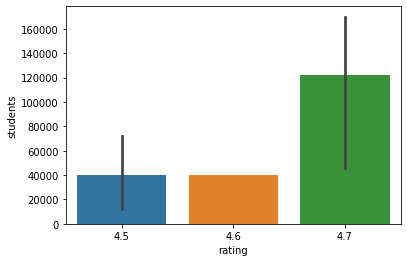

In [19]:
sns.barplot(x="rating",y="students",data=df_tensorflow)

ML kurslarının katılımcıya göre sıralanması

In [20]:
df_ml=df[df['title'].str.contains('Machine Learning')].sort_values(by=['students'], 
                                                                   ascending=False)

In [21]:
df_ml

,title,organization,rating,difficulty,students
563,Machine Learning,University of Washington,4.6,2,290000
565,Machine Learning Foundations: A Case Study App...,University of Washington,4.6,3,240000
763,Structuring Machine Learning Projects,deeplearning.ai,4.8,1,220000
200,Data Science: Statistics and Machine Learning,Johns Hopkins University,4.4,2,210000
28,Advanced Machine Learning,National Research University Higher School of ...,4.5,0,190000
57,Applied Machine Learning in Python,University of Michigan,4.6,2,150000
595,Mathematics for Machine Learning,Imperial College London,4.6,1,150000
520,Introduction to TensorFlow for Artificial Inte...,deeplearning.ai,4.7,2,150000
596,Mathematics for Machine Learning: Linear Algebra,Imperial College London,4.7,1,140000
570,Machine Learning with Python,IBM,4.7,2,120000


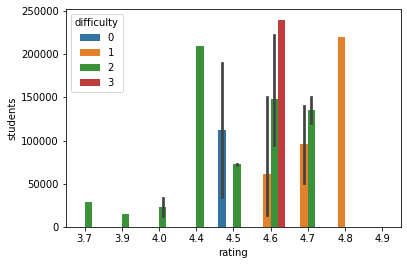

In [22]:
sns.barplot(x="rating",y="students",hue="difficulty",data=df_ml)

Deep Learning  kurslarının katılımcıya göre sıralanması

In [23]:
df_dl=df[df['title'].str.contains('Deep Learning')].sort_values(by=['students'], 
                                                                   ascending=False)

In [24]:
df_dl

,title,organization,rating,difficulty,students
211,Deep Learning,deeplearning.ai,4.8,2,690000
626,Neural Networks and Deep Learning,deeplearning.ai,4.9,2,630000
520,Introduction to TensorFlow for Artificial Inte...,deeplearning.ai,4.7,2,150000


Data içerikli kursların katılımcıya göre sıralanması

In [25]:
df_data=df[df['title'].str.contains('Data')].sort_values(by=['students'], 
                                                                   ascending=False)

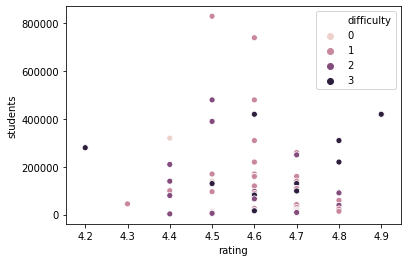

In [26]:
sns.scatterplot(x="rating",y="students",hue="difficulty",data=df_data);

Data science  kurslarının katılımcı sayısına  göre sıralanması

In [27]:
df_data_science=df[df['title'].str.contains('Data Science')].sort_values(by=['students'], 
                                                                   ascending=False)

In [28]:
df_data_science

,title,organization,rating,difficulty,students
196,Data Science,Johns Hopkins University,4.5,1,830000
199,Data Science: Foundations using R,Johns Hopkins University,4.6,1,740000
56,Applied Data Science with Python,University of Michigan,4.5,2,480000
420,IBM Data Science,IBM,4.6,1,480000
487,Introduction to Data Science in Python,University of Michigan,4.5,2,390000
27,Advanced Data Science with IBM,IBM,4.4,0,320000
486,Introduction to Data Science,IBM,4.6,1,310000
864,What is Data Science?,IBM,4.7,1,260000
54,Applied Data Science,IBM,4.6,1,220000
200,Data Science: Statistics and Machine Learning,Johns Hopkins University,4.4,2,210000


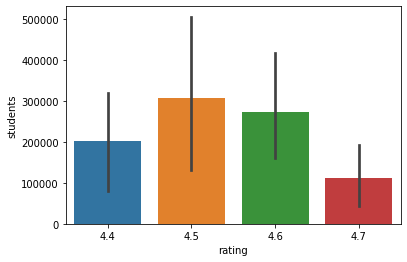

In [29]:
sns.barplot(x="rating",y="students",data=df_data_science)

In [30]:
df_sql=df[df['title'].str.contains('SQL')].sort_values(by=['students'], 
                                                                   ascending=False)

In [31]:
df_sql

,title,organization,rating,difficulty,students
296,Excel to MySQL: Analytic Techniques for Business,Duke University,4.6,1,490000
553,Learn SQL Basics for Data Science,"University of California, Davis",4.6,1,160000
711,SQL for Data Science,"University of California, Davis",4.6,1,160000
208,Databases and SQL for Data Science,IBM,4.7,1,110000
610,Modern Big Data Analysis with SQL,Cloudera,4.8,1,14000
